## A4_4 : Conjoint Analysis
                    Gauri Vinod Nair
                    V01110160

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re  # For regular expressions
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
# Load the dataset
pizza_data = pd.read_csv('pizza_data.csv')
pizza_data.head()

,brand,price,weight,crust,cheese,size,toppings,spicy,ranking
0,Dominos,$1.00,100g,thin,Mozzarella,regular,paneer,normal,11
1,Pizza hut,$3.00,100g,thin,Cheddar,large,mushroom,normal,12
2,Onesta,$4.00,200g,thin,Mozzarella,regular,mushroom,normal,9
3,Pizza hut,$4.00,400g,thick,Cheddar,regular,paneer,normal,2
4,Pizza hut,$2.00,300g,thin,Mozzarella,regular,mushroom,extra,8


In [16]:
# Data cleaning: Remove non-numeric characters from price column
pizza_data['price'] = pizza_data['price'].replace('[\$,]', '', regex=True).astype(float)

In [18]:
# Extract numeric part from 'weight' column
pizza_data['weight'] = pizza_data['weight'].str.extract('(\d+\.?\d*)').astype(float)

In [4]:
# Check for missing values
print(pizza_data.isnull().sum())

brand       0
price       0
weight      0
crust       0
cheese      0
size        0
toppings    0
spicy       0
ranking     0
dtype: int64


In [5]:
# Summary statistics
print(pizza_data.describe())

         ranking
count  16.000000
mean    8.500000
std     4.760952
min     1.000000
25%     4.750000
50%     8.500000
75%    12.250000
max    16.000000


In [6]:
# EDA: Visualize distributions and relationships
# Example plots (customize as needed)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Price')

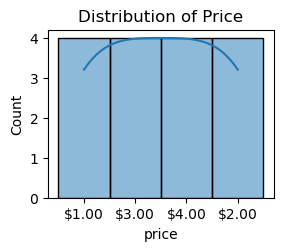

In [7]:
# Example 1: Distribution of Price
plt.subplot(2, 2, 1)
sns.histplot(pizza_data['price'], bins=10, kde=True)
plt.title('Distribution of Price')

Text(0.5, 1.0, 'Price vs Ranking')

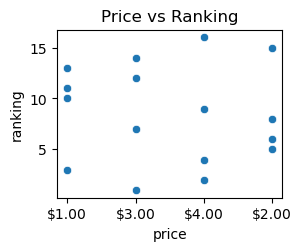

In [8]:
# Example 2: Relationship between Price and Ranking
plt.subplot(2, 2, 2)
sns.scatterplot(x='price', y='ranking', data=pizza_data)
plt.title('Price vs Ranking')

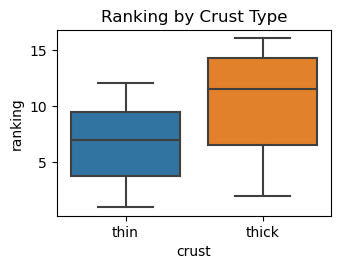

In [9]:
# Example 3: Boxplot of Ranking by Crust Type
plt.subplot(2, 2, 3)
sns.boxplot(x='crust', y='ranking', data=pizza_data)
plt.title('Ranking by Crust Type')

plt.tight_layout()
plt.show()

In [10]:
# Data preprocessing (example: encoding categorical variables)
# Convert categorical variables to numerical using one-hot encoding
pizza_data = pd.get_dummies(pizza_data, columns=['crust', 'cheese', 'size', 'toppings', 'spicy'], drop_first=True)

In [19]:
# Standardize numerical variables
scaler = StandardScaler()
pizza_data[['price', 'weight']] = scaler.fit_transform(pizza_data[['price', 'weight']])

In [20]:
# Create the design matrix for conjoint analysis
X = pizza_data.drop(['brand', 'ranking'], axis=1)  # Exclude brand and ranking (dependent variable)
y = pizza_data['ranking']  # Target variable

In [21]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
# Extract coefficients as part-worth utilities
part_worths = model.coef_

In [23]:
# Print part-worth utilities
print("Part-Worth Utilities (Coefficients):\n")
for idx, feature in enumerate(X.columns):
    print(f"{feature}: {part_worths[idx]}")

Part-Worth Utilities (Coefficients):

price: -0.503115294937453
weight: -3.969020660062128
crust_thin: -3.5000000000000027
cheese_Mozzarella: 0.49999999999999856
size_regular: 0.49999999999999845
toppings_paneer: -2.250000000000001
spicy_normal: -1.5000000000000004


In [24]:
# Calculate relative importance of attributes
total_importance = sum(abs(part_worths))
relative_importance = [abs(pw) / total_importance for pw in part_worths]

In [25]:
# Print relative importance of attributes
print("\nRelative Importance of Attributes:\n")
for idx, feature in enumerate(X.columns):
    print(f"{feature}: {relative_importance[idx]}")


Relative Importance of Attributes:

price: 0.03954644854583064
weight: 0.3119775385282194
crust_thin: 0.27511103578676677
cheese_Mozzarella: 0.03930157654096654
size_regular: 0.03930157654096653
toppings_paneer: 0.17685709443435002
spicy_normal: 0.1179047296229
